In [939]:
import pandas as pd
import numpy as np
import torch
from torch import tensor
import matplotlib.pyplot as plt
%matplotlib inline

In [1061]:
#Loading the dataset
#data = pd.read_csv("carprice.csv", na_values = ['no info', '.','',' '])
data = pd.read_csv("carprice.csv")

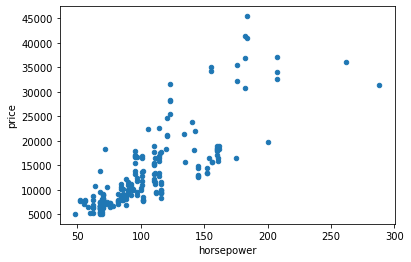

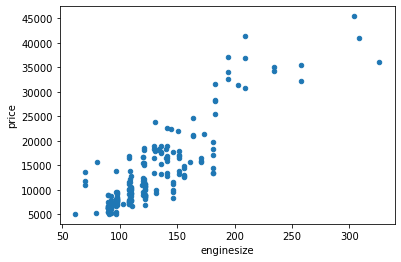

In [1063]:
#Plotting the Dataset
data.plot(kind = 'scatter', x = 'horsepower', y = 'price')
data.plot(kind = 'scatter', x = 'enginesize', y = 'price')

In [1064]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [1065]:
data = data[['enginesize','horsepower','price']]

In [1066]:
data.head()

,enginesize,horsepower,price
0,130,111,13495.0
1,130,111,16500.0
2,152,154,16500.0
3,109,102,13950.0
4,136,115,17450.0


In [1067]:
#normalization

data = data.apply(
    lambda x: (x - x.mean()) / x.std()
)


In [1068]:
#data = data[:1] #to get rid of first column that is added instead of headings (it was 1 and 0)

In [1069]:
data

,enginesize,horsepower,price
0,0.074267,0.174057,0.027324
1,0.074267,0.174057,0.403473
2,0.602571,1.261448,0.403473
3,-0.430023,-0.053537,0.084279
4,0.218350,0.275209,0.522389
...,...,...,...
200,0.338419,0.249921,0.446659
201,0.338419,1.413178,0.722042
202,1.106861,0.755685,1.027468
203,0.434474,0.047616,1.150765


In [1070]:
data[['price']]

,price
0,0.027324
1,0.403473
2,0.403473
3,0.084279
4,0.522389
...,...
200,0.446659
201,0.722042
202,1.027468
203,1.150765


In [1071]:
data

,enginesize,horsepower,price
0,0.074267,0.174057,0.027324
1,0.074267,0.174057,0.403473
2,0.602571,1.261448,0.403473
3,-0.430023,-0.053537,0.084279
4,0.218350,0.275209,0.522389
...,...,...,...
200,0.338419,0.249921,0.446659
201,0.338419,1.413178,0.722042
202,1.106861,0.755685,1.027468
203,0.434474,0.047616,1.150765


In [1072]:
data.shape

(205, 3)

In [1073]:
x_data = data[['enginesize','horsepower']]
x = torch.tensor(x_data.values).float()

In [1074]:
#x = x[1:] #to get rid of first column that is added instead of headings (it was 1 and 0)

In [1075]:
x.shape

torch.Size([205, 2])

In [1076]:
x[1]

tensor([0.0743, 0.1741])

In [1077]:
x[1:,0]

tensor([ 0.0743,  0.6026, -0.4300,  0.2184,  0.2184,  0.2184,  0.2184,  0.0983,
         0.0983, -0.4540, -0.4540,  0.8907,  0.8907,  0.8907,  1.9714,  1.9714,
         1.9714, -1.5827, -0.8863, -0.8863, -0.8863, -0.8863, -0.6942, -0.8863,
        -0.8863, -0.8863, -0.6942, -0.1178,  0.6986, -0.8383, -0.8383, -1.1504,
        -0.8383, -0.8383, -0.8383, -0.8383, -0.4060, -0.4060, -0.4060, -0.4060,
        -0.4060, -0.4060, -0.3820, -0.8863, -0.8863, -0.1899,  3.1480,  3.1480,
         4.7810, -0.8623, -0.8623, -0.8623, -0.8623, -0.8623, -1.3666, -1.3666,
        -1.3666, -1.1264, -0.1178, -0.1178, -0.1178, -0.1178, -0.1178, -0.1178,
         0.3144,  0.1703,  1.3470,  1.3470,  1.3470,  1.3470,  2.5717,  2.5717,
         4.3487,  4.2527,  0.3144, -0.8383, -0.8383, -0.8383, -0.6942, -0.4060,
        -0.1178,  0.6986,  0.6986,  0.6986, -0.1178, -0.1178, -0.4060, -0.4060,
        -0.7182, -0.5741, -0.7182, -0.7182, -0.7182, -0.7182, -0.7182, -0.7182,
        -0.7182, -0.7182, -0.1659, -0.16

In [1078]:
x.shape

torch.Size([205, 2])

In [1079]:
#x[:,1].uniform_(1)

In [1080]:
x

tensor([[ 0.0743,  0.1741],
        [ 0.0743,  0.1741],
        [ 0.6026,  1.2614],
        [-0.4300, -0.0535],
        [ 0.2184,  0.2752],
        [ 0.2184,  0.1488],
        [ 0.2184,  0.1488],
        [ 0.2184,  0.1488],
        [ 0.0983,  0.9074],
        [ 0.0983,  1.4132],
        [-0.4540, -0.0788],
        [-0.4540, -0.0788],
        [ 0.8907,  0.4269],
        [ 0.8907,  0.4269],
        [ 0.8907,  0.4269],
        [ 1.9714,  1.9695],
        [ 1.9714,  1.9695],
        [ 1.9714,  1.9695],
        [-1.5827, -1.4191],
        [-0.8863, -0.8628],
        [-0.8863, -0.8628],
        [-0.8863, -0.9133],
        [-0.8863, -0.9133],
        [-0.6942, -0.0535],
        [-0.8863, -0.9133],
        [-0.8863, -0.9133],
        [-0.8863, -0.9133],
        [-0.6942, -0.0535],
        [-0.1178, -0.4076],
        [ 0.6986,  1.0339],
        [-0.8383, -1.1662],
        [-0.8383, -0.7110],
        [-1.1504, -1.1156],
        [-0.8383, -0.7110],
        [-0.8383, -0.7110],
        [-0.8383, -0

In [1081]:
x.shape

torch.Size([205, 2])

In [1082]:
y = torch.tensor(data['price'].values).float()
y

tensor([ 2.7324e-02,  4.0347e-01,  4.0347e-01,  8.4279e-02,  5.2239e-01,
         2.4701e-01,  5.5493e-01,  7.0640e-01,  1.3266e+00,  5.7361e-01,
         3.9471e-01,  4.5667e-01,  9.6300e-01,  9.7990e-01,  1.4130e+00,
         2.1885e+00,  3.5097e+00,  2.9545e+00, -1.0171e+00, -8.7393e-01,
        -8.3888e-01, -9.6443e-01, -8.6367e-01, -6.6589e-01, -8.8219e-01,
        -8.2424e-01, -7.0945e-01, -5.9066e-01, -5.4522e-01, -3.9143e-02,
        -8.5090e-01, -8.0383e-01, -9.8609e-01, -8.4464e-01, -7.6954e-01,
        -7.4876e-01, -7.4876e-01, -6.7365e-01, -5.2344e-01, -5.5474e-01,
        -3.7323e-01, -4.1522e-02, -3.6698e-01, -8.1260e-01, -5.4579e-01,
        -5.4579e-01, -2.7898e-01,  2.3750e+00,  2.7880e+00,  2.8444e+00,
        -1.0116e+00, -8.9897e-01, -8.1134e-01, -8.2386e-01, -7.3624e-01,
        -2.9187e-01, -1.7921e-01,  4.6100e-02,  2.9645e-01, -5.5474e-01,
        -5.9855e-01, -3.3568e-01, -3.7949e-01, -3.1065e-01, -2.5432e-01,
         6.2628e-01,  6.3430e-01,  1.5366e+00,  1.8

In [1083]:
y.shape

torch.Size([205])

In [1084]:
#y = y[1:]

In [1085]:
y.shape

torch.Size([205])

In [1086]:
#y = y[6:,6]

In [1087]:
y

tensor([ 2.7324e-02,  4.0347e-01,  4.0347e-01,  8.4279e-02,  5.2239e-01,
         2.4701e-01,  5.5493e-01,  7.0640e-01,  1.3266e+00,  5.7361e-01,
         3.9471e-01,  4.5667e-01,  9.6300e-01,  9.7990e-01,  1.4130e+00,
         2.1885e+00,  3.5097e+00,  2.9545e+00, -1.0171e+00, -8.7393e-01,
        -8.3888e-01, -9.6443e-01, -8.6367e-01, -6.6589e-01, -8.8219e-01,
        -8.2424e-01, -7.0945e-01, -5.9066e-01, -5.4522e-01, -3.9143e-02,
        -8.5090e-01, -8.0383e-01, -9.8609e-01, -8.4464e-01, -7.6954e-01,
        -7.4876e-01, -7.4876e-01, -6.7365e-01, -5.2344e-01, -5.5474e-01,
        -3.7323e-01, -4.1522e-02, -3.6698e-01, -8.1260e-01, -5.4579e-01,
        -5.4579e-01, -2.7898e-01,  2.3750e+00,  2.7880e+00,  2.8444e+00,
        -1.0116e+00, -8.9897e-01, -8.1134e-01, -8.2386e-01, -7.3624e-01,
        -2.9187e-01, -1.7921e-01,  4.6100e-02,  2.9645e-01, -5.5474e-01,
        -5.9855e-01, -3.3568e-01, -3.7949e-01, -3.1065e-01, -2.5432e-01,
         6.2628e-01,  6.3430e-01,  1.5366e+00,  1.8

In [1088]:
y.shape

torch.Size([205])

In [1089]:
W = torch.nn.Parameter(tensor([1.,-1])) #nn is a lib. We create a tensor with random weights. Parameter means it'll calc gradients

In [1090]:
def linear(x, W): #linear regression
  return x@W

In [1091]:
y_hat = linear(x, W)

In [1092]:
def mse(y_hat, y_true): #loss func
  return ((y_hat - y_true)**2).mean()

In [1093]:
loss = mse(y_hat, y)

In [1094]:
loss

tensor(1.2424, grad_fn=<MeanBackward0>)

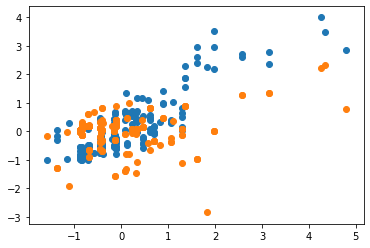

In [1095]:
y_h = linear(x, W).detach() #for matplotlib
plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], y_h) #our linear regression prediction before learning (random weights)

Gradient Descent

In [1096]:
learning_rate = 0.000001
#Forward pass
y_hat = linear(x, W)
loss = mse(y_hat, y)

loss.backward() #gradient calc for all parameters

#Gradient descent

with torch.no_grad(): 
  W.sub_(learning_rate * W.grad)
  W.grad.zero_()

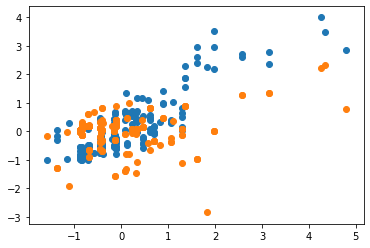

In [1097]:
y_h = linear(x, W).detach() #for matplotlib
plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], y_h) #our linear regression prediction before learning (random weights)

In [1098]:
def train():
  
  #Forward pass
  y_hat = linear(x, W)
  loss = mse(y_hat, y)

  loss.backward() #gradient calc for all parameters
  print (loss)
  
  #Gradient descent

  with torch.no_grad(): 
    W.sub_(learning_rate * W.grad)
    W.grad.zero_()
  return y_hat.detach()


In [1099]:
learning_rate = 0.01
W = torch.nn.Parameter(tensor([0.1225,  0.2487])) #nn is a lib. We create a tensor with random weights. Parameter means it'll calc gradients
losses = []

EPOCHS = 100
for i in range(EPOCHS):
  train()
  print("@epoch : ", i, " #Loss : ", loss.item())
#  losses.append(loss)

tensor(0.5076, grad_fn=<MeanBackward0>)
@epoch :  0  #Loss :  1.2423608303070068
tensor(0.4876, grad_fn=<MeanBackward0>)
@epoch :  1  #Loss :  1.2423608303070068
tensor(0.4689, grad_fn=<MeanBackward0>)
@epoch :  2  #Loss :  1.2423608303070068
tensor(0.4516, grad_fn=<MeanBackward0>)
@epoch :  3  #Loss :  1.2423608303070068
tensor(0.4355, grad_fn=<MeanBackward0>)
@epoch :  4  #Loss :  1.2423608303070068
tensor(0.4206, grad_fn=<MeanBackward0>)
@epoch :  5  #Loss :  1.2423608303070068
tensor(0.4067, grad_fn=<MeanBackward0>)
@epoch :  6  #Loss :  1.2423608303070068
tensor(0.3937, grad_fn=<MeanBackward0>)
@epoch :  7  #Loss :  1.2423608303070068
tensor(0.3817, grad_fn=<MeanBackward0>)
@epoch :  8  #Loss :  1.2423608303070068
tensor(0.3705, grad_fn=<MeanBackward0>)
@epoch :  9  #Loss :  1.2423608303070068
tensor(0.3601, grad_fn=<MeanBackward0>)
@epoch :  10  #Loss :  1.2423608303070068
tensor(0.3504, grad_fn=<MeanBackward0>)
@epoch :  11  #Loss :  1.2423608303070068
tensor(0.3414, grad_fn=<Me

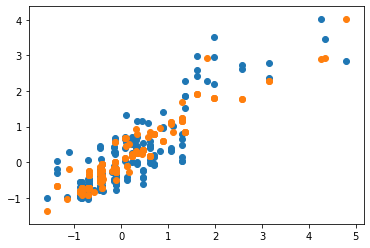

In [1100]:
y_h = linear(x, W).detach() #for matplotlib
plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], y_h) #our linear regression prediction before learning (random weights)

In [1101]:
W

Parameter containing:
tensor([0.4692, 0.4461], requires_grad=True)

In [1102]:
#Predicting for enginesize 220
x_engine = tensor([0.074267,0.174057])

In [1103]:
y_pred = x_engine@W

In [1104]:
y_pred

tensor(0.1125, grad_fn=<DotBackward>)